In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('Display.max_columns',None)

In [85]:
df=pd.read_csv('Anonymize_Loan_Default_data.csv',encoding='latin1')
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,Jan-01,0.0,NaN,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,38476,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,Aug-11,Fully Paid,credit_card,805xx,CO,22.17,0.0,Jan-00,2.0,NaN,12.0,0.0,16550.0,73.50%,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,NaN,Jun-16,0
38476,38477,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,Aug-11,Fully Paid,credit_card,442xx,OH,11.57,0.0,Apr-99,1.0,NaN,21.0,0.0,16898.0,39.70%,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,NaN,Jun-16,0
38477,38478,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,May-10,Fully Paid,debt_consolidation,073xx,NJ,10.63,0.0,Dec-95,1.0,NaN,9.0,1.0,10386.0,62.20%,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,NaN,Feb-16,0
38478,38479,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,Jul-11,Fully Paid,debt_consolidation,061xx,CT,18.97,0.0,Jul-07,2.0,NaN,8.0,0.0,7301.0,53.30%,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,NaN,Sep-15,0


# Preprorcessing Data Part 1

In [86]:
df.select_dtypes(include='object').nunique()

,0
term,2
emp_length,11
home_ownership,5
verification_status,3
issue_d,57
loan_status,9
purpose,14
zip_code,834
addr_state,52
earliest_cr_line,528


In [87]:
# Remove unused column and identifier column
df.drop(columns = ['Unnamed: 0', 'id', 'member_id', 'issue_d', 'zip_code', 'earliest_cr_line',
                   'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,ZZ,0.00,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00,1
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,3075.29,2500.00,575.29,90.85,0
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,NY,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,2948.76,1909.02,873.81,175.67,1
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,TX,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,0
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,NY,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,0


In [88]:
mapping={1:'fail',0:'good'}
df['repay_fail']=df['repay_fail'].map(mapping)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,ZZ,0.00,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00,fail
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,3075.29,2500.00,575.29,90.85,good
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,NY,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,2948.76,1909.02,873.81,175.67,fail
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,TX,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,good
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,NY,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,good


In [89]:
df.addr_state.unique()

array(['ZZ', 'MI', 'NY', 'TX', 'AL', 'AZ', 'MO', 'OH', 'CA', 'AR', 'NJ',
       'WI', 'VA', 'GA', 'FL', 'AK', 'MA', 'MN', 'MD', 'NV', 'KY', 'IL',
       'AA', 'NH', 'CT', 'WA', 'NC', 'SD', 'UT', 'OR', 'DC', 'WY', 'KS',
       'PA', 'SC', 'RI', 'HI', 'LA', 'CO', 'WV', 'OK', 'VT', 'MT', 'NM',
       'DE', 'TN', 'MS', 'NE', 'IN', 'ID', 'IA', 'ME'], dtype=object)

In [90]:
df['addr_state']=df['addr_state'].astype('object')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,ZZ,0.00,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00,fail
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,3075.29,2500.00,575.29,90.85,good
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,NY,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,2948.76,1909.02,873.81,175.67,fail
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,TX,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,good
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,NY,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,good


In [91]:
def segment_state(states):
  us_states_segmented = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'OH', 'SD', 'WI'],
    'South': ['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'],
    'West': ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY'],
    'Other': ['DC', 'AA', 'ZZ']
}

  for key,value in us_states_segmented.items():
    if any(state in states for state in value):
      return key
  return 'Other'

In [92]:
df['addr_state']=df['addr_state'].apply(segment_state)

In [93]:
df['addr_state'].value_counts()

,count
addr_state,
South,12378
West,10942
Northeast,9406
Midwest,5556
Other,198


In [94]:
state_percentages=(df.groupby(df['addr_state'])['repay_fail']
                   .value_counts(normalize=True)
                   .unstack(fill_value=0)
                   .mul(100)
                   .rename(columns={0: 'Repay Success (%)', 1: 'Repay Failure (%)'})
)
state_percentages.reset_index(inplace=True)
state_percentages

repay_fail,addr_state,fail,good
0,Midwest,14.848812,85.151188
1,Northeast,13.789071,86.210929
2,Other,8.080808,91.919192
3,South,15.277105,84.722895
4,West,16.450375,83.549625


# EDA

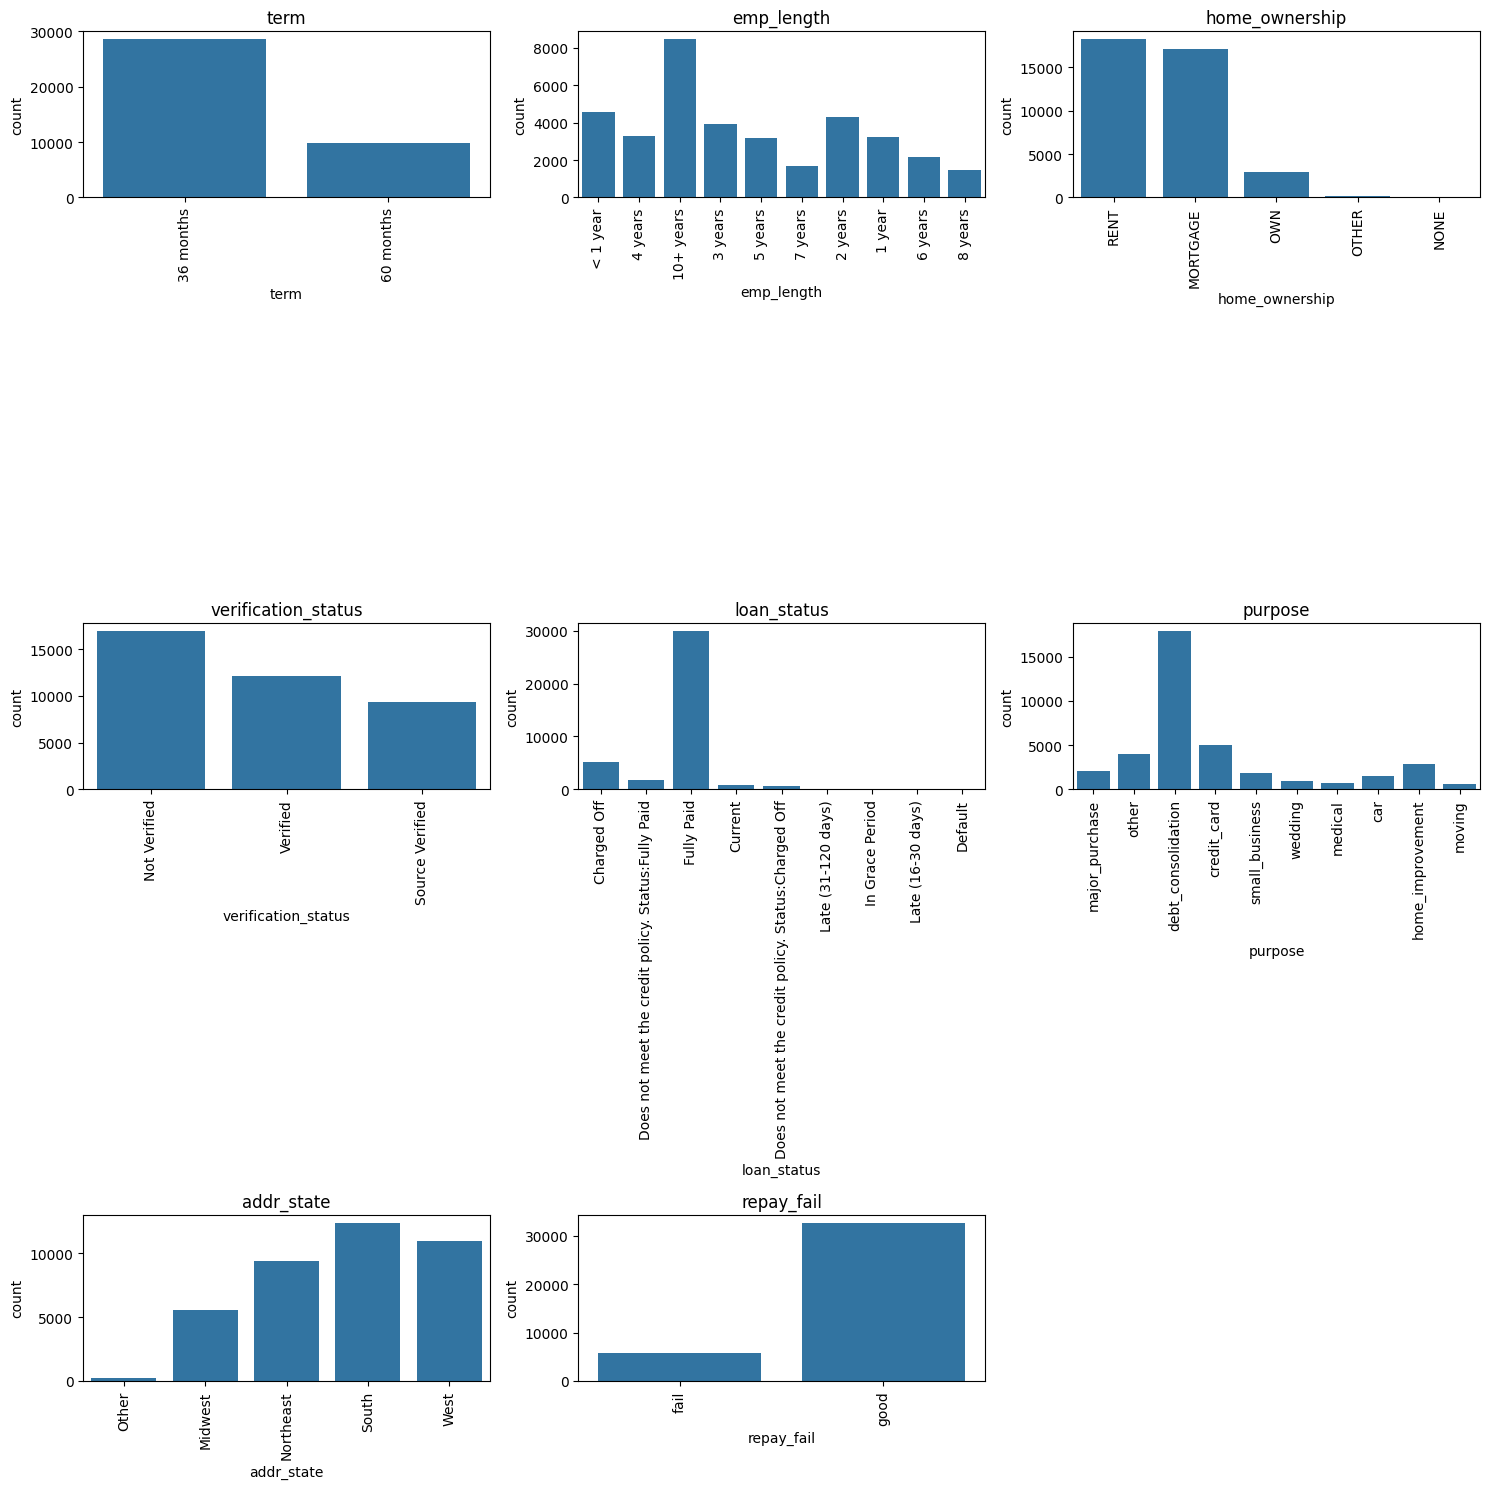

In [76]:
cat_vars=df.select_dtypes(include=['object']).columns.tolist()

num_cols=len(cat_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  top_values=df[var].value_counts().nlargest(10).index
  filtered_df=df[df[var].isin(top_values)]
  sns.countplot(x=var,data=filtered_df,ax=axs[i])
  # axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
  axs[i].tick_params(axis='x',rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

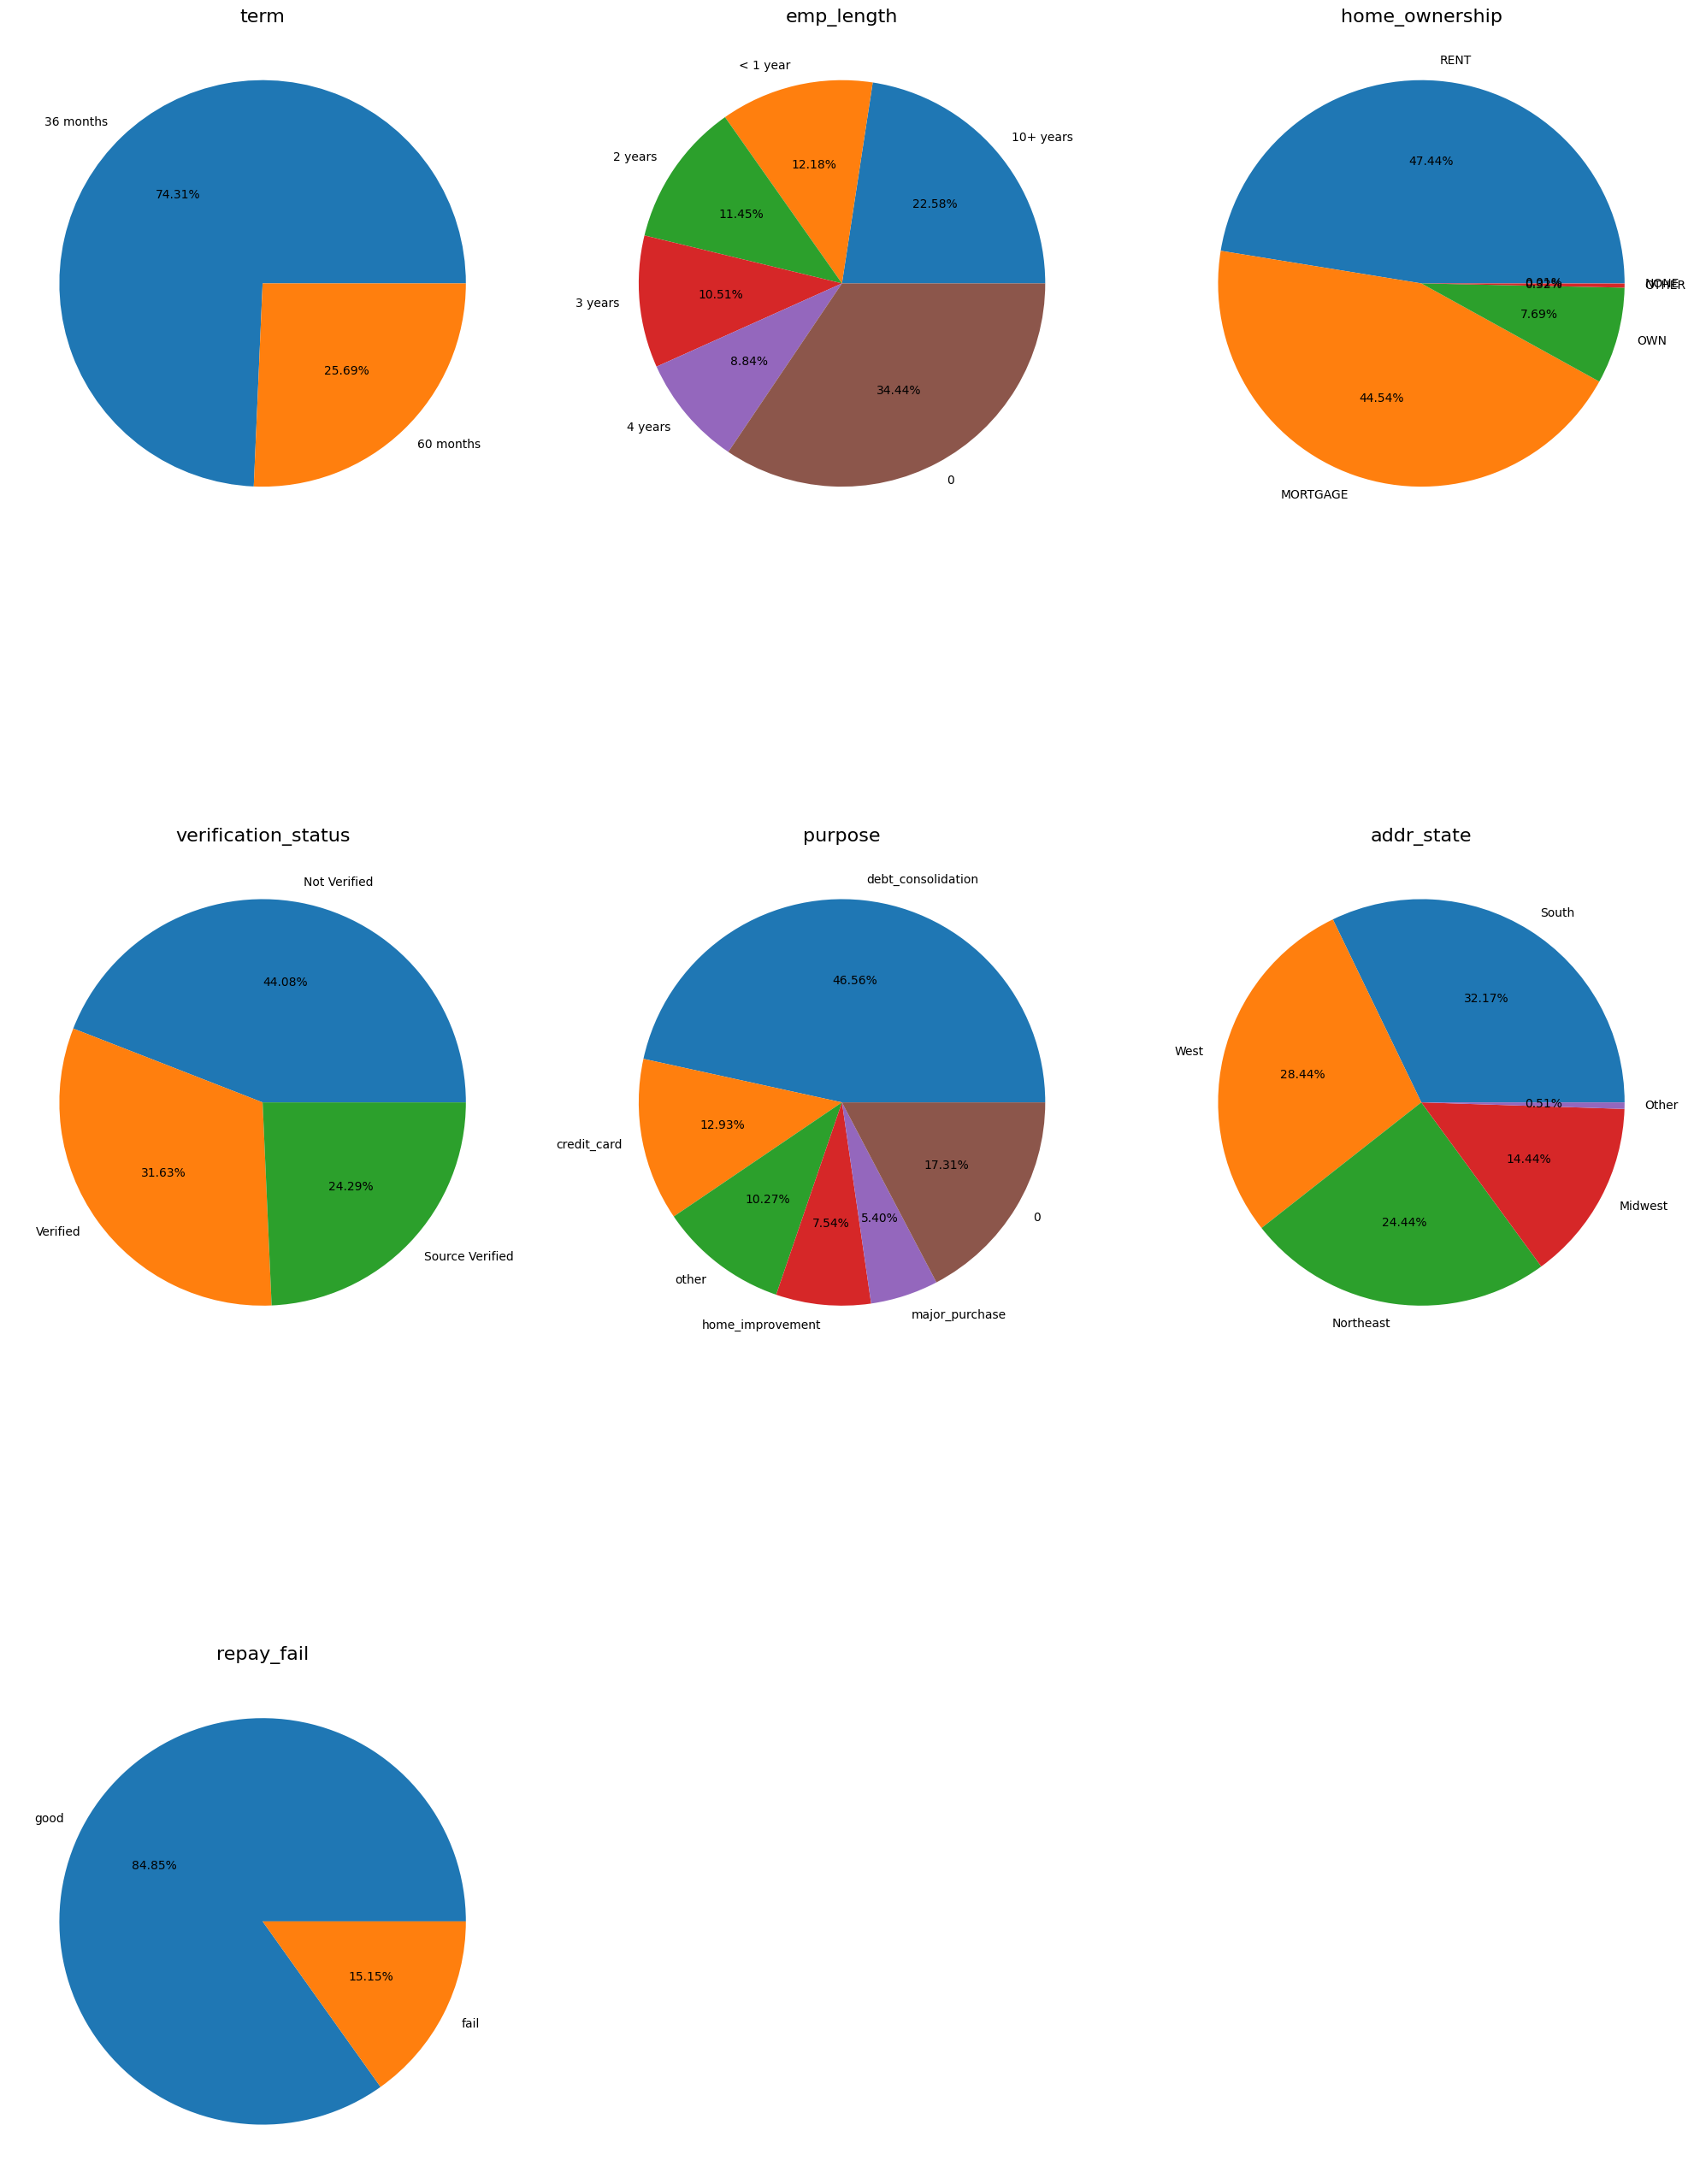

In [77]:
cat_vars=df.select_dtypes(include='object').columns.tolist()
cat_vars.remove('loan_status')
max_categories=5

num_cols=len(cat_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  if i < len(axs):
    cat_counts=df[var].value_counts()

  if len(cat_counts)>5:
    cat_tops=cat_counts[:max_categories]
    cat_others=pd.Series(cat_counts[max_categories:].sum())
    cat_counts=pd.concat([cat_tops,cat_others])
  axs[i].pie(cat_counts,labels=cat_counts.index,autopct="%1.2f%%")
  axs[i].set_title(var,fontsize=16)

if num_cols < len(axs):
  for i in range (num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

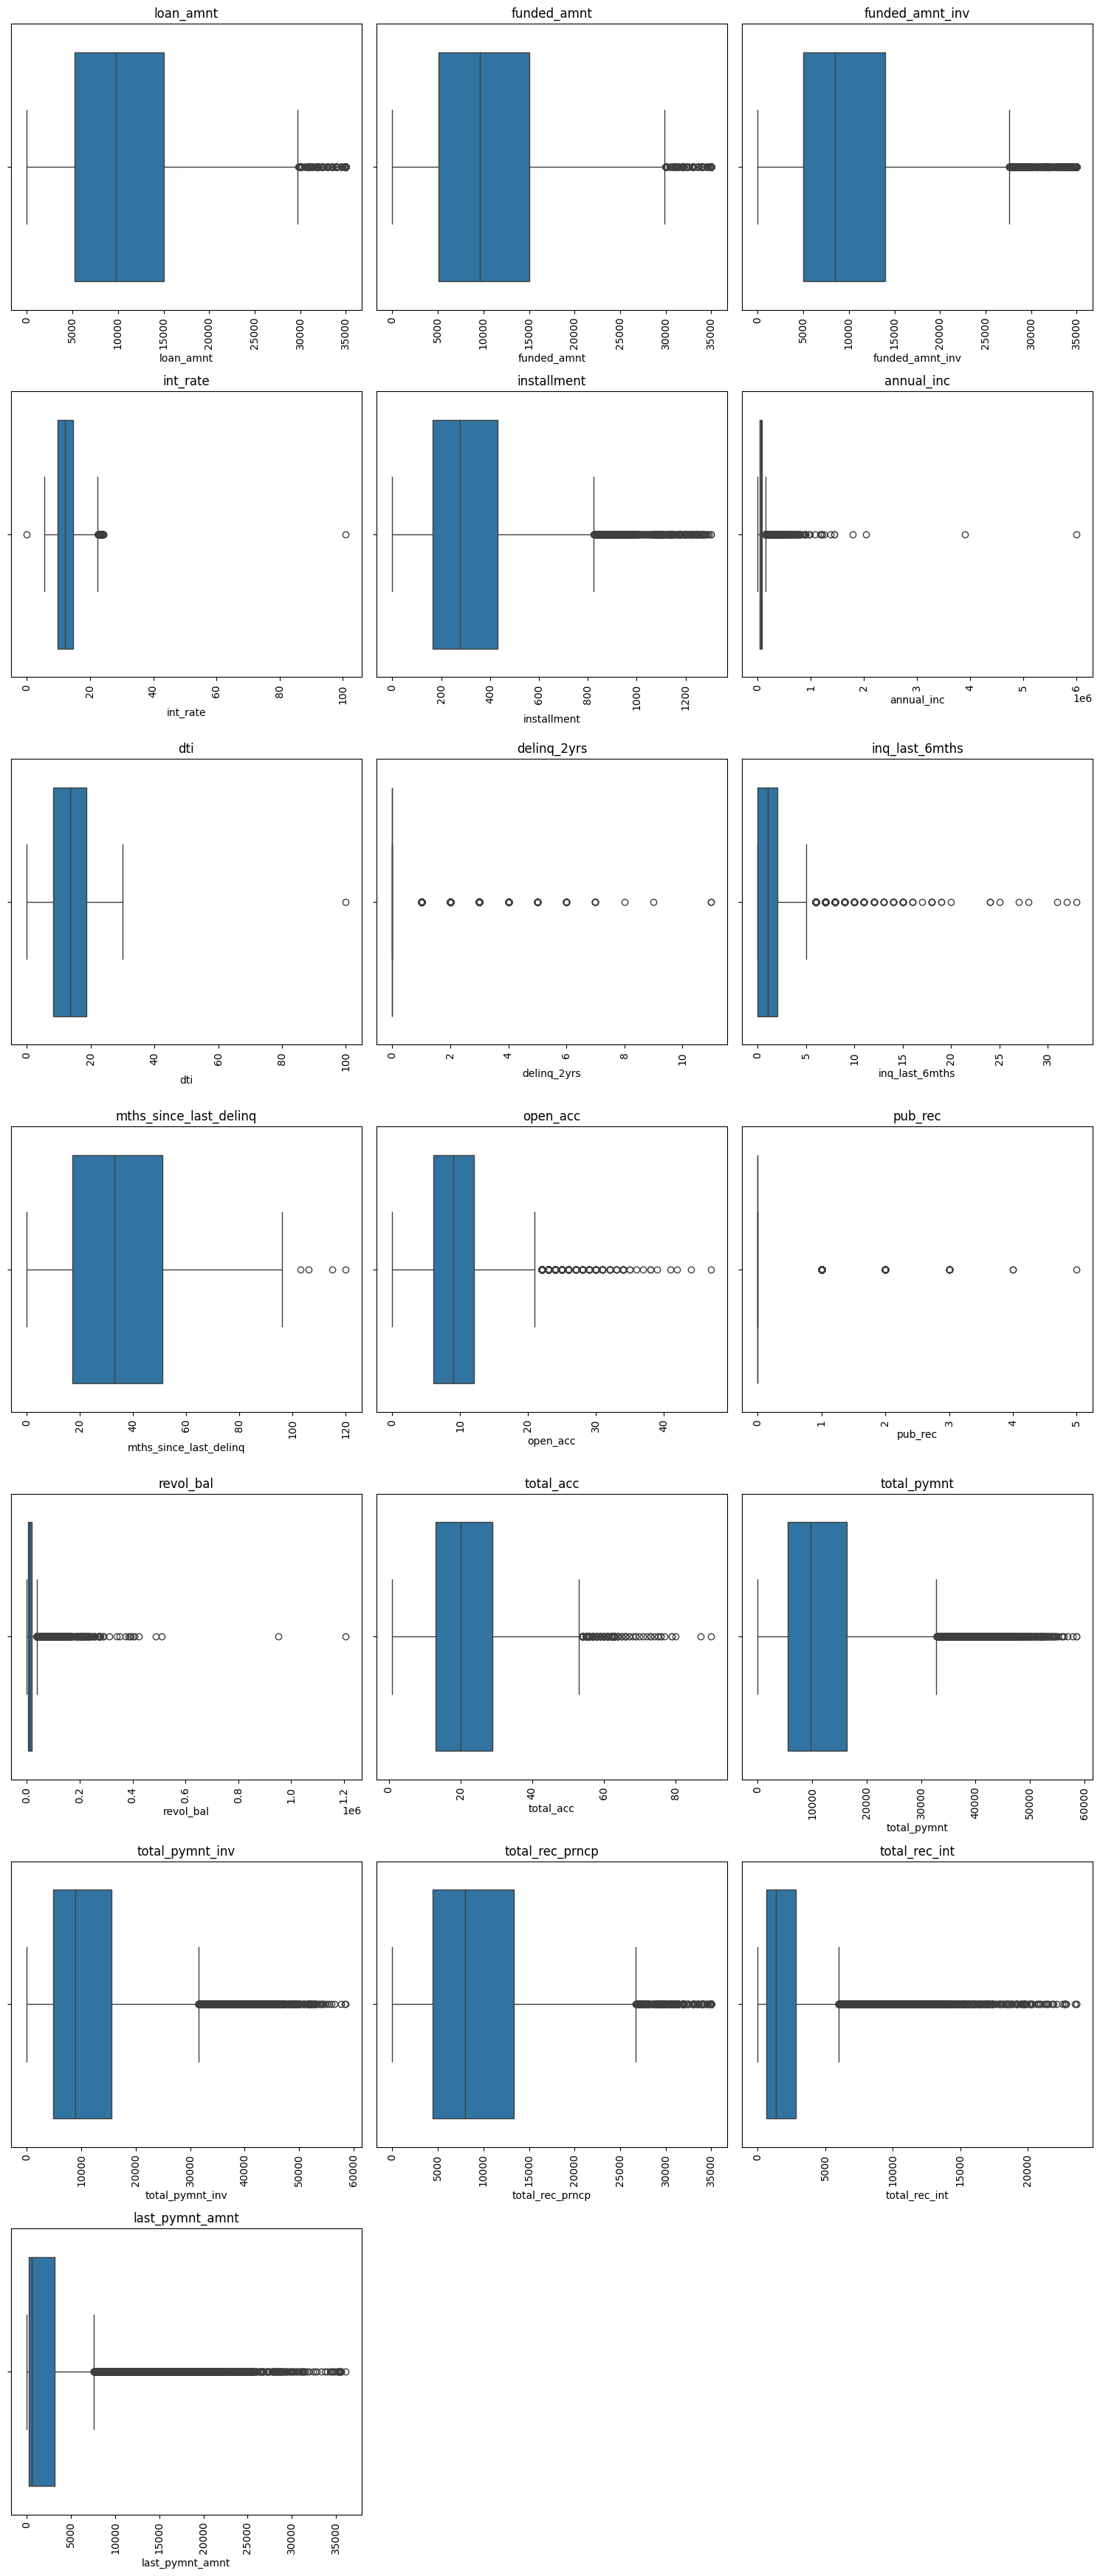

In [78]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(x=var,data=df,ax=axs[i])
  axs[i].tick_params(axis='x',rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

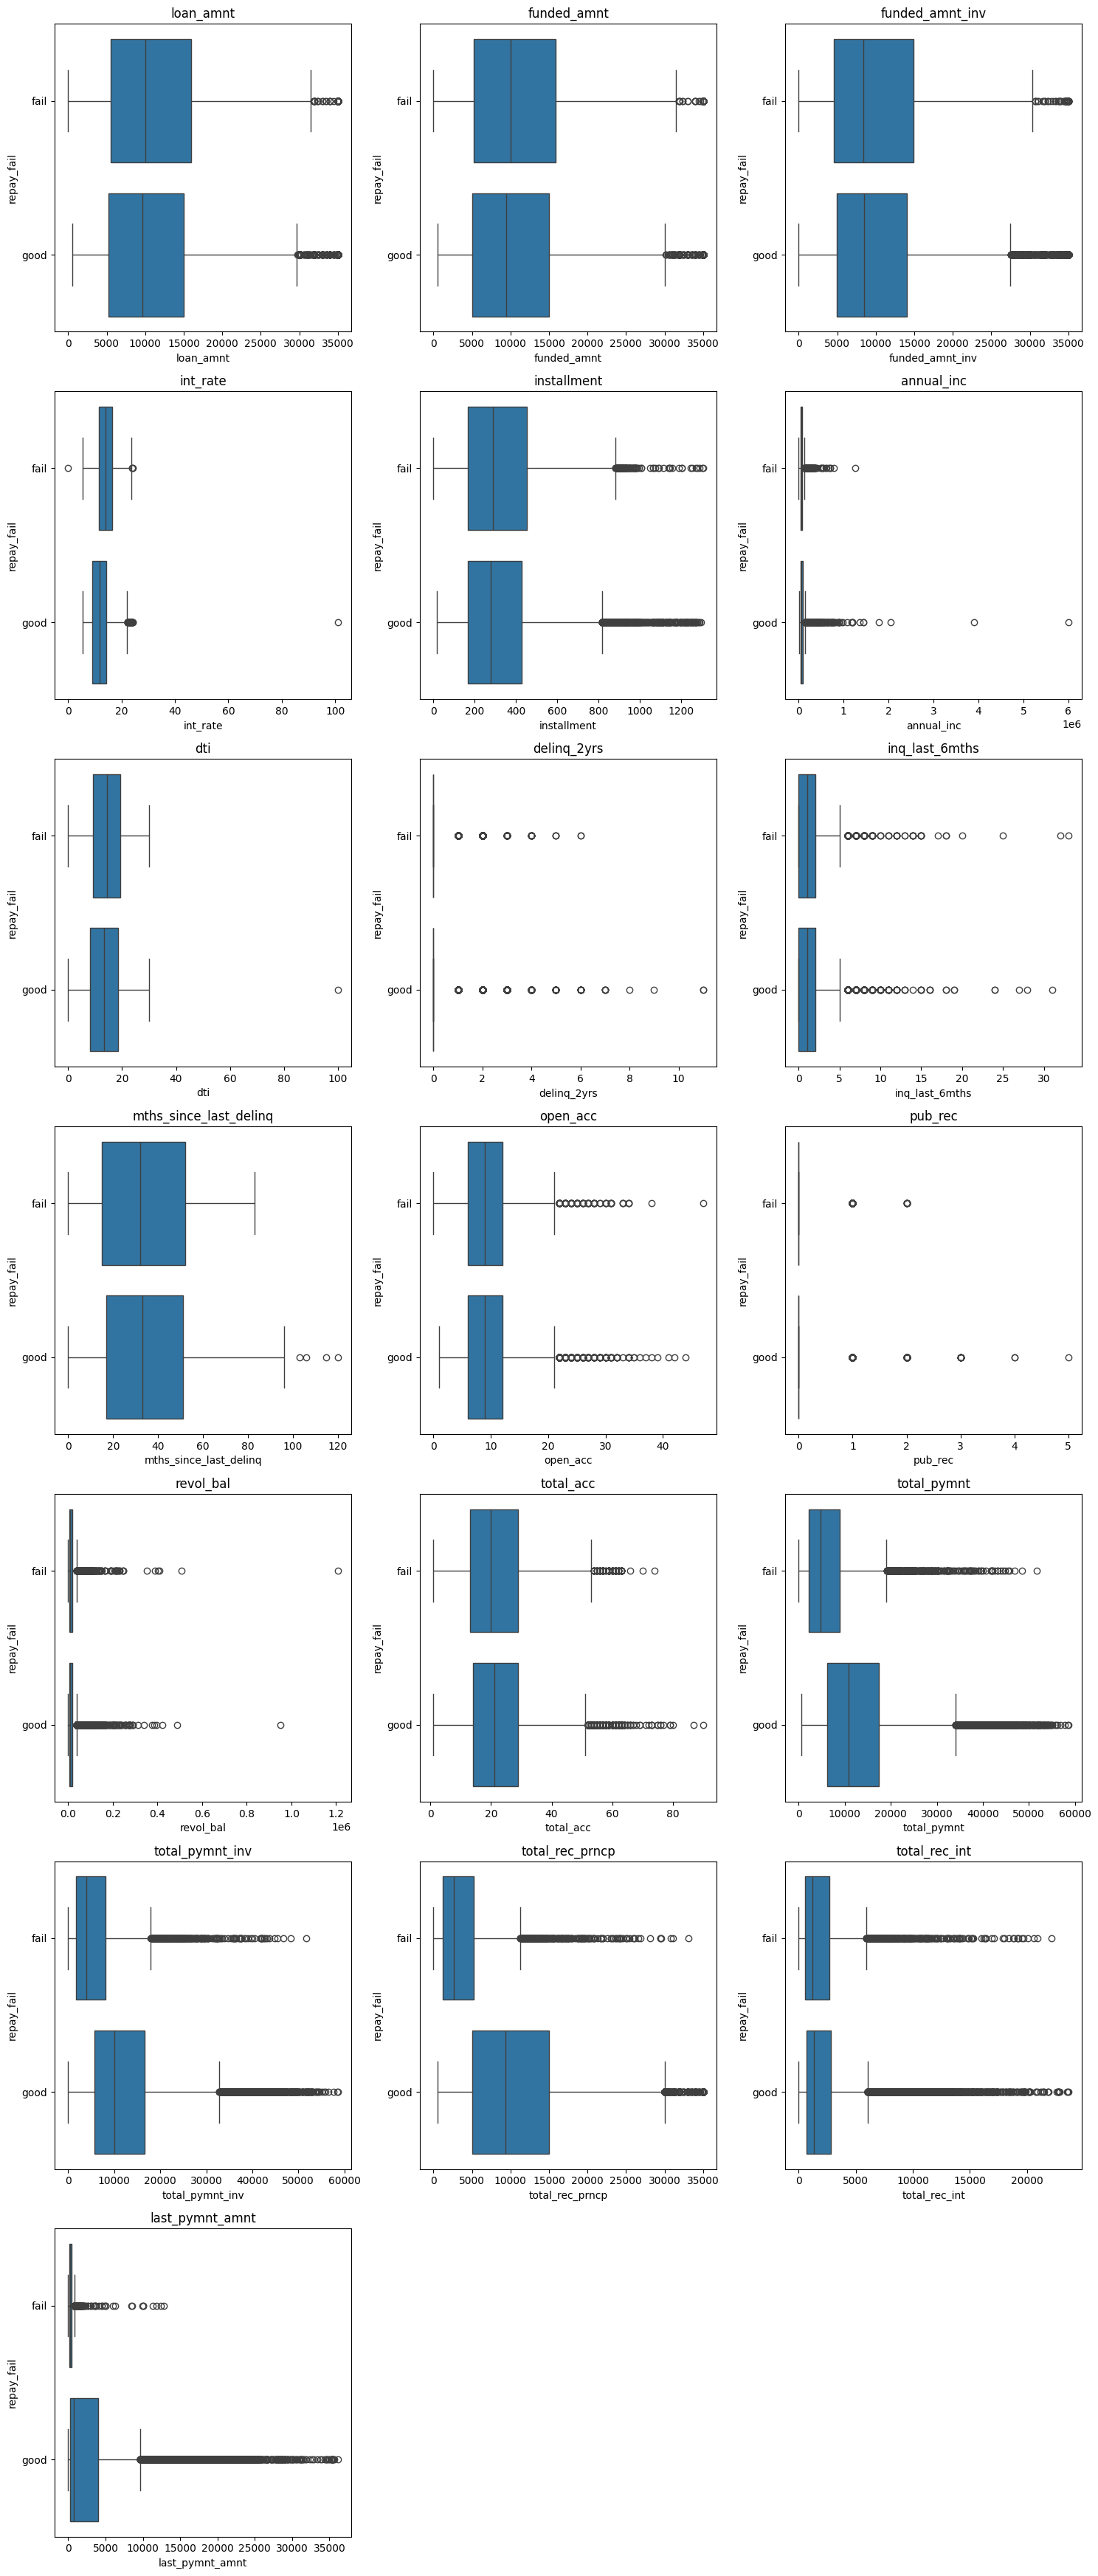

In [79]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(x=var,y='repay_fail',data=df,ax=axs[i])
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

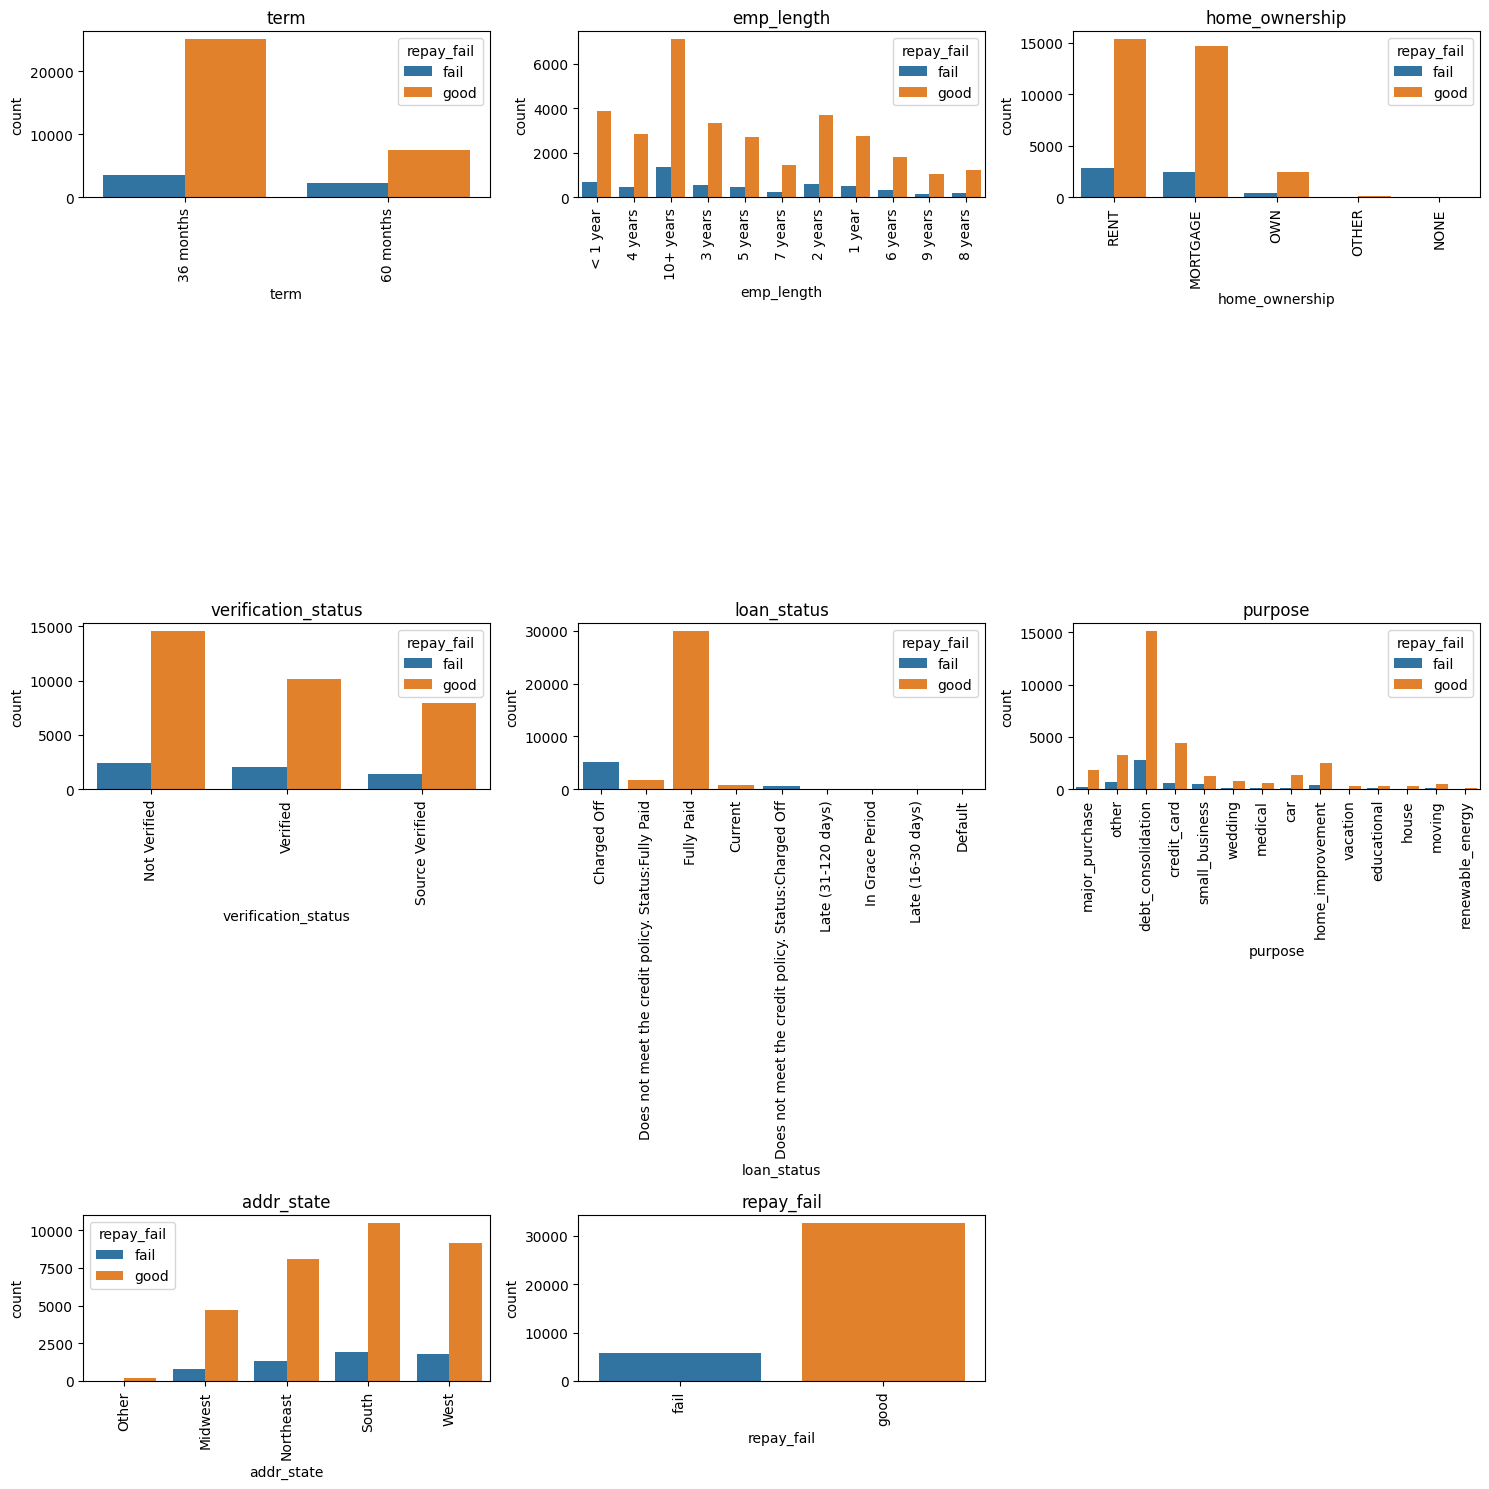

In [80]:
num_vars=df.select_dtypes(include=['object']).columns.tolist()

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.countplot(x=var,hue='repay_fail',data=df,ax=axs[i])
  axs[i].tick_params(axis='x',rotation=90)
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<ipython-input-81-be01ec4448f3>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
<ipython-input-81-be01ec4448f3>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
<ipython-input-81-be01ec4448f3>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
<ipython-input-81-be01ec4448f3>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
<ipython-input-81-be01ec4448f3>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

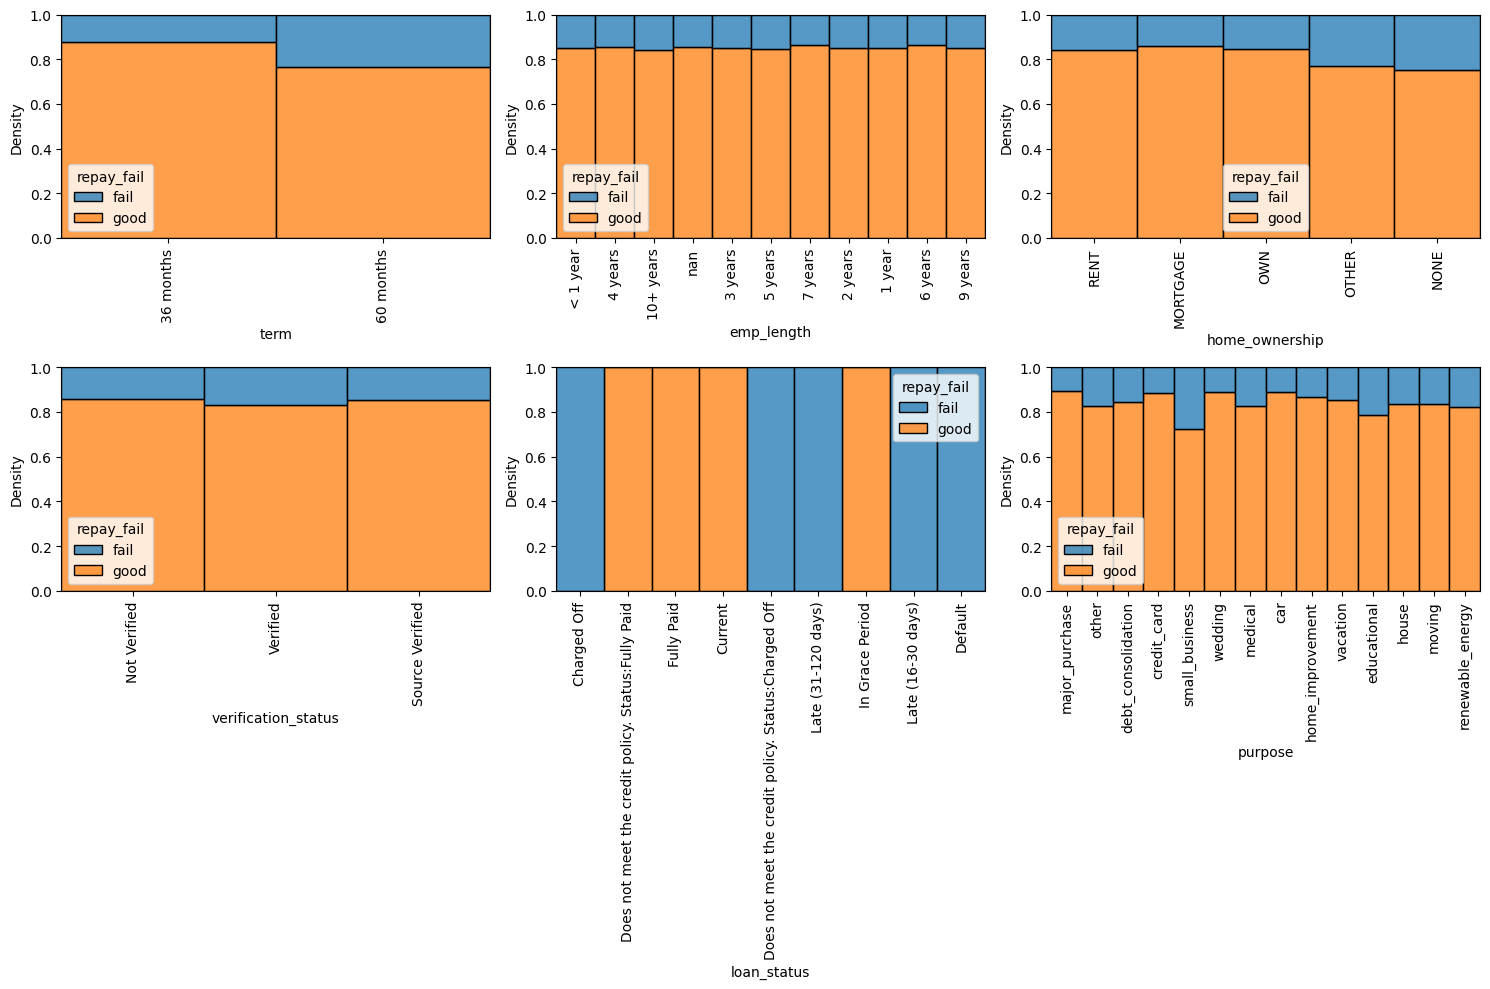

In [81]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Remove 'repay_fail' and 'addr_state' from the list of categorical variables
cat_vars = [var for var in cat_vars if var not in ['repay_fail', 'addr_state']]

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='repay_fail', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

# Preprocessing Data Part 2

In [82]:
df.isnull().sum()

,0
loan_amnt,1
funded_amnt,1
funded_amnt_inv,1
term,0
int_rate,0
installment,1
emp_length,993
home_ownership,0
annual_inc,2
verification_status,0


In [83]:
df=df.dropna()
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

for i in df.select_dtypes(include='object'):
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
0,0.0,0.0,0.0,0,0.00,0.00,10,4,0.0,0,0,6,2,0.00,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00,0
1,2500.0,2500.0,2500.0,0,13.98,85.42,4,4,20004.0,0,4,9,0,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,3075.29,2500.00,575.29,90.85,1
2,5000.0,5000.0,5000.0,0,15.95,175.67,4,4,59000.0,0,0,2,1,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,2948.76,1909.02,873.81,175.67,0
3,7000.0,7000.0,7000.0,0,9.91,225.58,1,0,53796.0,0,5,9,3,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,1
4,2000.0,2000.0,2000.0,0,5.42,60.32,1,4,30000.0,0,5,2,1,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,1


In [100]:
from scipy import stats

selected_columns = ['loan_amnt', 'int_rate', 'installment',
                    'annual_inc', 'dti', 'inq_last_6mths', 'total_acc',
                    'open_acc', 'revol_bal', 'total_pymnt', 'total_rec_int',
                    'last_pymnt_amnt']

zscore=np.abs(stats.zscore(df[selected_columns]))
outlier=np.where(zscore > 3)[0]
df=df.drop(index=outlier)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
1,2500.0,2500.0,2500.0,0,13.98,85.42,4,4,20004.0,0,4,9,0,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,3075.29,2500.00,575.29,90.85,1
2,5000.0,5000.0,5000.0,0,15.95,175.67,4,4,59000.0,0,0,2,1,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,2948.76,1909.02,873.81,175.67,0
3,7000.0,7000.0,7000.0,0,9.91,225.58,1,0,53796.0,0,5,9,3,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27,1
4,2000.0,2000.0,2000.0,0,5.42,60.32,1,4,30000.0,0,5,2,1,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12,1
5,3600.0,3600.0,3600.0,0,10.25,116.59,1,0,675048.0,0,4,9,3,1.55,0.0,4.0,25.0,8.0,0.0,0.0,25.0,4206.031191,4206.03,3600.00,606.03,146.75,1


In [101]:
df.shape

(38452, 27)

<Axes: >

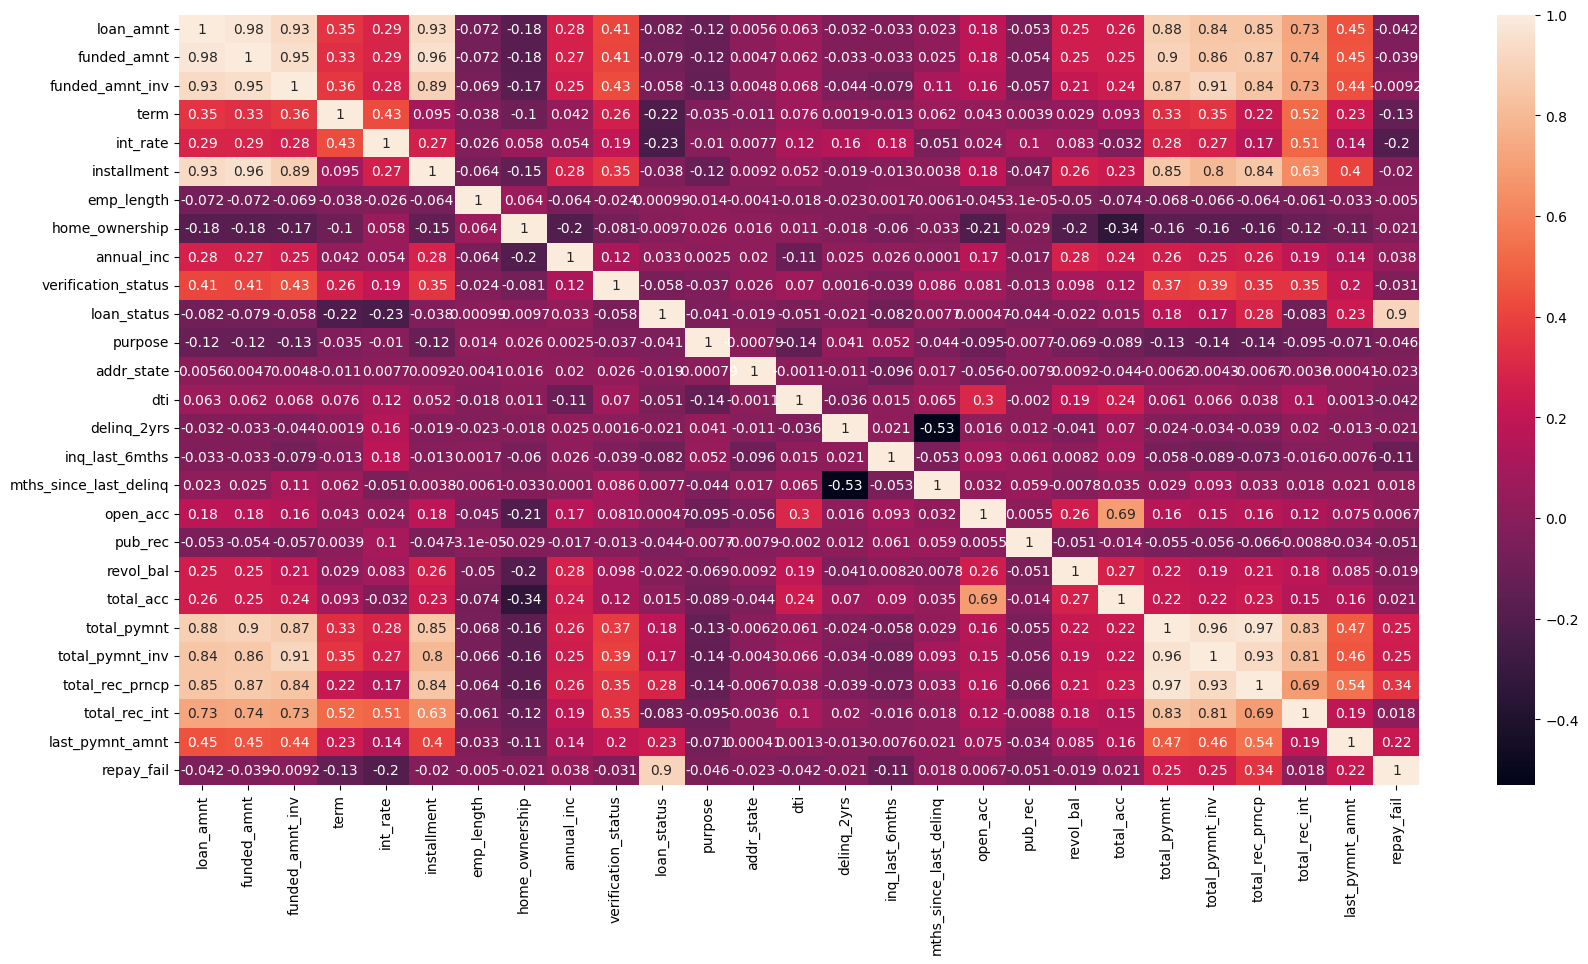

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [103]:
# Drop column total_pymnt_inv, loan_status, total_rec_prncp, funded_amnt, funded_amnt_inv to reduce redudancy
df.drop(columns = ['total_pymnt_inv', 'loan_status', 'total_rec_prncp', 'funded_amnt', 'funded_amnt_inv'], inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_int,last_pymnt_amnt,repay_fail
1,2500.0,0,13.98,85.42,4,4,20004.0,0,9,0,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,575.29,90.85,1
2,5000.0,0,15.95,175.67,4,4,59000.0,0,2,1,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,873.81,175.67,0
3,7000.0,0,9.91,225.58,1,0,53796.0,0,9,3,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,1082.39,1550.27,1
4,2000.0,0,5.42,60.32,1,4,30000.0,0,2,1,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,161.66,53.12,1
5,3600.0,0,10.25,116.59,1,0,675048.0,0,9,3,1.55,0.0,4.0,25.0,8.0,0.0,0.0,25.0,4206.031191,606.03,146.75,1


# Model Building

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('repay_fail', axis=1)
y = df['repay_fail']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [114]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [116]:
from sklearn.metrics import classification_report

y_pred=rf.predict(X_test_scaled)
print('Report:\n',classification_report(y_test,y_pred))

Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89      1176
           1       0.97      1.00      0.98      6515

    accuracy                           0.97      7691
   macro avg       0.98      0.90      0.94      7691
weighted avg       0.97      0.97      0.97      7691



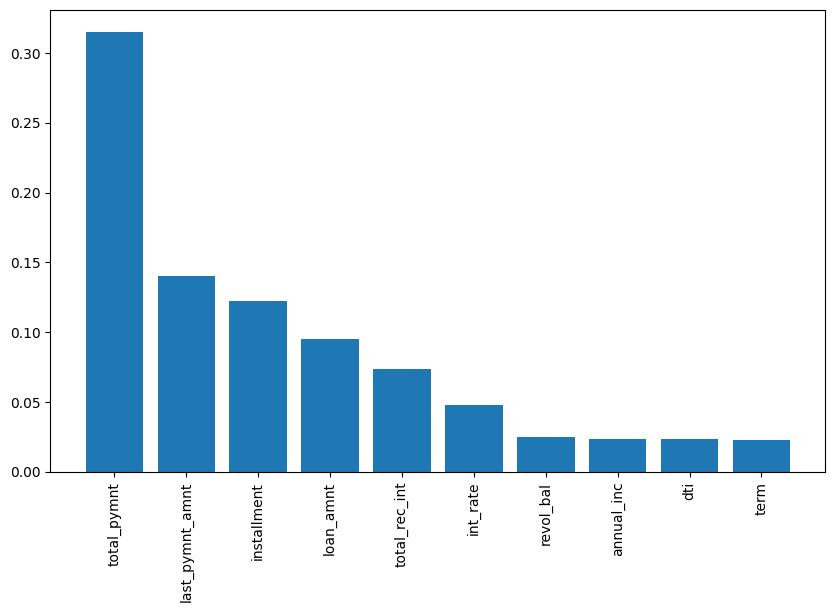

In [119]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':rf.feature_importances_
})
imp=imp_df.nlargest(10,'Importance')
plt.figure(figsize=(10,6))
plt.bar(imp['Kolom'],imp['Importance'])
plt.xticks(rotation=90)
plt.show()

In [120]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb=XGBClassifier()
param_grid=({
    'learning_rate':[1,0.1,0.001],
    'max_depth':[2,3,4,5],
    'n_estimators':[50,100,150,200]
})
grid=GridSearchCV(xgb,param_grid,cv=5)
grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 200}


In [123]:
xgb=XGBClassifier(learning_rate=1,max_depth=2,n_estimators=200)
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [124]:
from sklearn.metrics import classification_report

y_pred=xgb.predict(X_test_scaled)
print('Report:\n',classification_report(y_test,y_pred))

Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1176
           1       0.99      1.00      0.99      6515

    accuracy                           0.99      7691
   macro avg       0.98      0.96      0.97      7691
weighted avg       0.99      0.99      0.98      7691



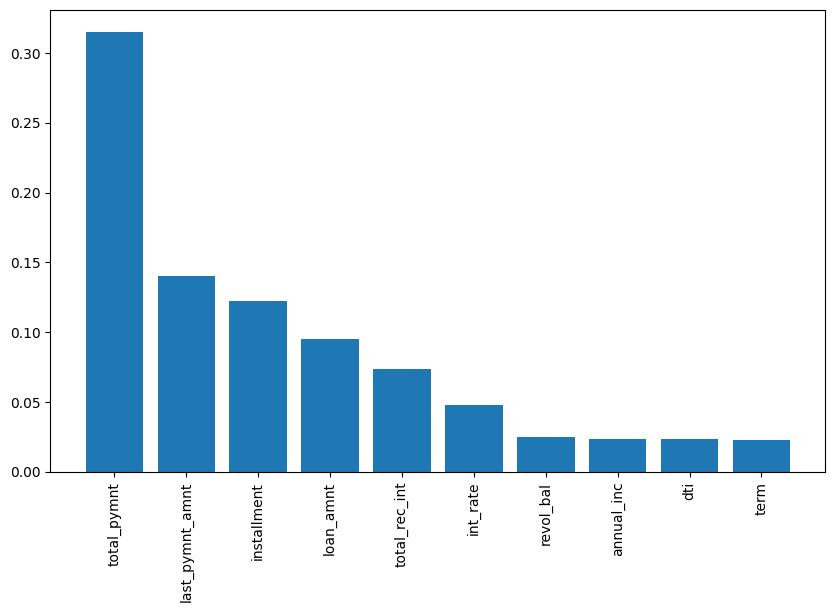

In [128]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':xgb.feature_importances_
})
imp1=imp_df.sort_values(by='Importance',ascending=False)
imp2=imp.head(10)
plt.figure(figsize=(10,6))
plt.bar(imp['Kolom'],imp['Importance'])
plt.xticks(rotation=90)
plt.show()

In [129]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_int,last_pymnt_amnt,repay_fail
1,2500.0,0,13.98,85.42,4,4,20004.0,0,9,0,19.86,0.0,5.0,NaN,7.0,0.0,981.0,10.0,3075.291779,575.29,90.85,1
2,5000.0,0,15.95,175.67,4,4,59000.0,0,2,1,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,15.0,2948.760000,873.81,175.67,0
3,7000.0,0,9.91,225.58,1,0,53796.0,0,9,3,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,20.0,8082.391880,1082.39,1550.27,1
4,2000.0,0,5.42,60.32,1,4,30000.0,0,2,1,3.60,0.0,0.0,72.0,7.0,0.0,0.0,15.0,2161.663244,161.66,53.12,1
5,3600.0,0,10.25,116.59,1,0,675048.0,0,9,3,1.55,0.0,4.0,25.0,8.0,0.0,0.0,25.0,4206.031191,606.03,146.75,1


In [139]:
df['repay_fail'].value_counts()

,count
repay_fail,
1,32631
0,5821


In [140]:
# input_user=[[2500.0,	0,	13.98,	85.42,	4,	4,	20004.0,	0,	9,	0,	19.86,	0.0,	5.0,	6	,7.0	,0.0,	981.0,	10.0,	3075.291779	,575.29	,90.85]]
# input_user = [[3200.0, 1, 20.45, 75.60, 3, 5, 25000.0, 1, 12, 1, 25.00, 1.0, 7.0, 8, 9.0, 1.0, 1025.0, 15.0, 4000.123456, 600.45, 85.75]]
input_user = [[5000.0, 0, 15.95, 175.67, 4, 4, 59000.0, 0, 2, 1, 19.57, 0.0, 1.0, 59.0, 7.0, 0.0, 18773.0, 15.0, 2948.760000, 873.81, 175.67]]
input_scaled=scaler.transform(input_user)
prediction=xgb.predict(input_scaled)
prediction_decoded=encoder.inverse_transform(prediction)
print('Repay Status:',prediction_decoded[0])

Repay Status: fail


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
